<a href="https://colab.research.google.com/github/BasraQasba/Machine-Learning/blob/main/Mushroom_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Loading Necessary data sets

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#### Importing the dataset

In [3]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### Since all the values in dataset is categorical therefore using imputer to convert all the values to numerical

In [4]:
#### Clecking for missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
### Binary Classification and the class is balanced
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
### using Label Encoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [7]:
##using for loop to encode all the features
for i in data:
    data1 = label_enc.fit_transform(data[i])
    pd.Series(data1)
    data[i] = data1

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [9]:
## finding correlation between dependent and independent variable to analyse the contribution of each feature to the label
correlation = data.corr()
correlation['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

In [10]:
##Upon review, I see that the veil-type as no relation with the target. Hence removing the same
data = data.drop(columns = 'veil-type')

In [11]:
corr_bet = data.corr()
corr_bet

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


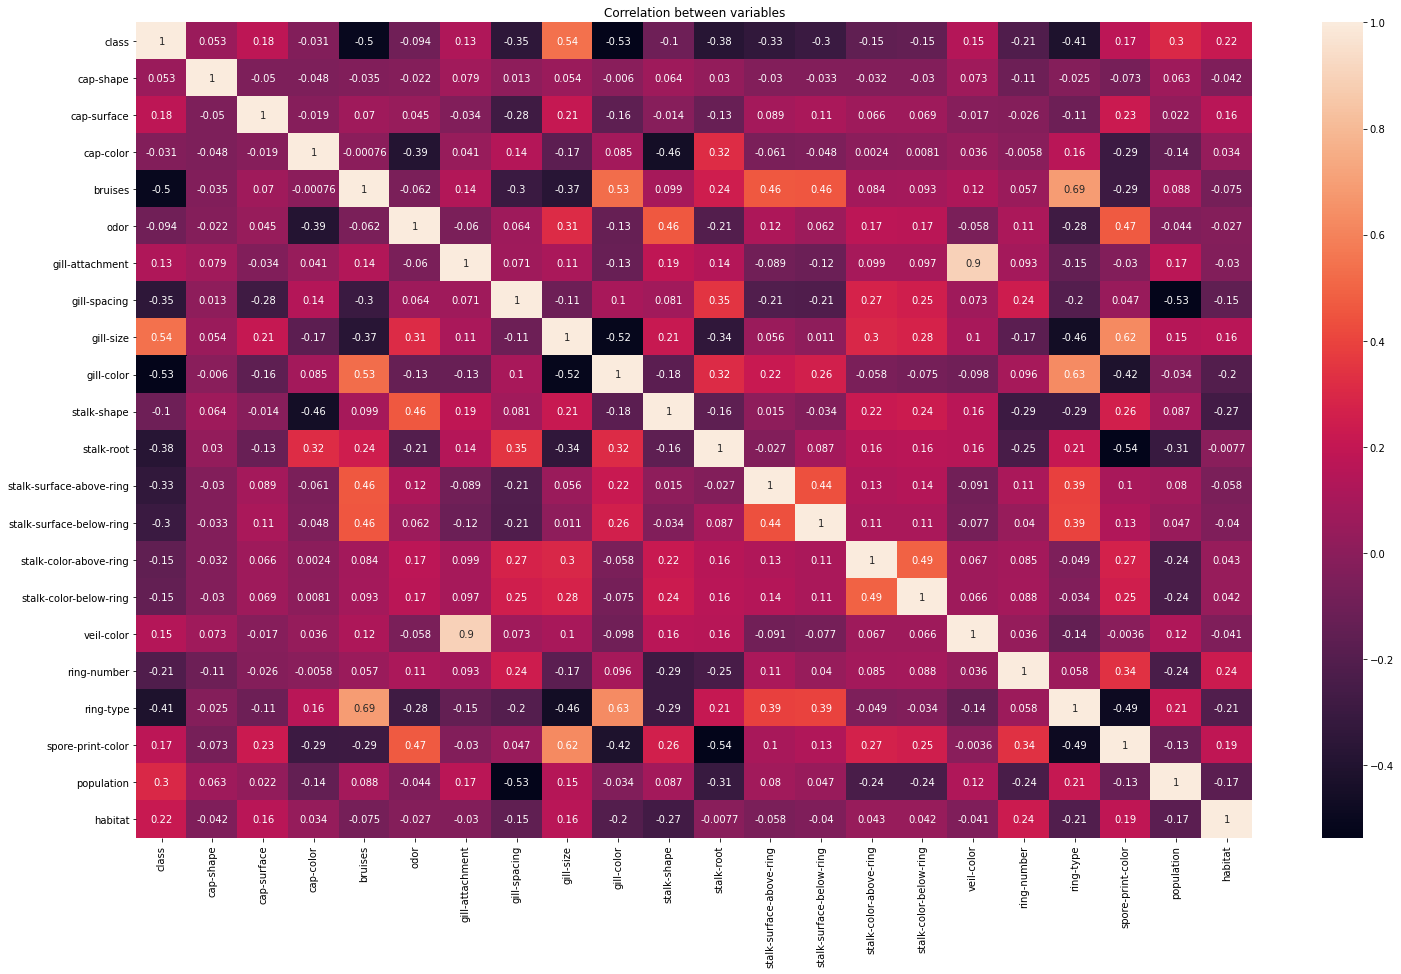

In [12]:
plt.figure(figsize = [25,15])
sns.heatmap(corr_bet,annot = True)
plt.title('Correlation between variables')
plt.show()


In [13]:
"""
Upon reviewing the heatmap for correlation between variables, I see that the variables veil-color and gill-attachment has very
strong correlation hence I'm removing one
"""

"\nUpon reviewing the heatmap for correlation between variables, I see that the variables veil-color and gill-attachment has very\nstrong correlation hence I'm removing one\n"

In [14]:
data =data.drop(columns = 'veil-color')

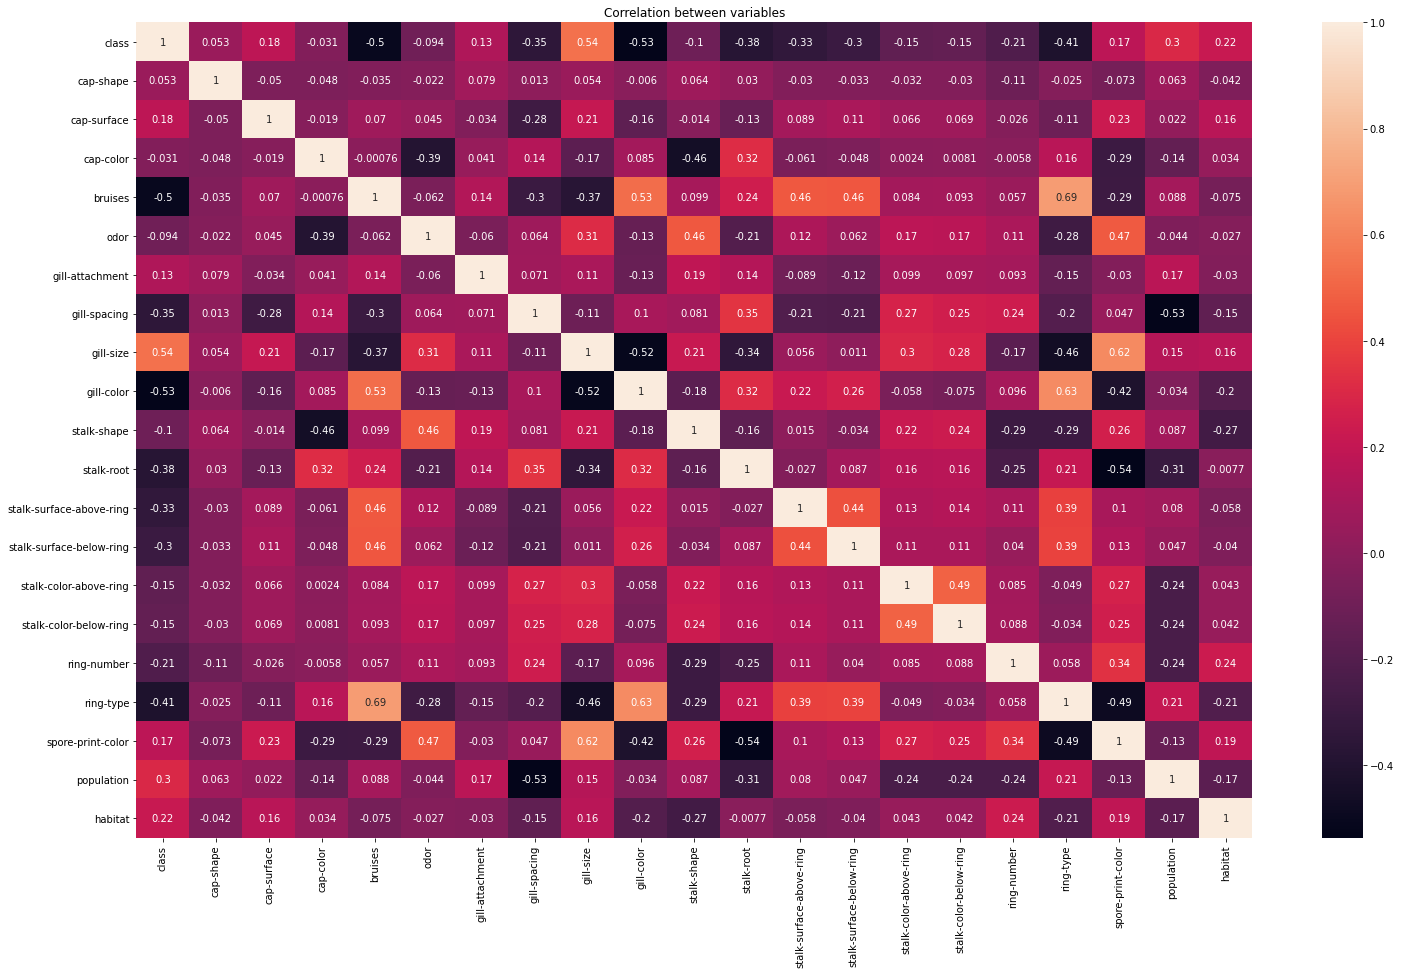

In [15]:
corr_feature = data.corr()
plt.figure(figsize = [25,15])
sns.heatmap(corr_feature,annot = True)
plt.title('Correlation between variables')
plt.show()

#### I am not checking for outliers because all the features are categorical.

In [16]:
### Proceeding with splitting features and class

x = data.drop(columns = 'class')
y = data['class']

In [ ]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=r2_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

In [23]:
###importing model evaluation and finding the best randomstate
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
acc = 0
best_rs = 0

for i in range(1,100):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred = log_reg.predict(x_test)
    mod_acc  = accuracy_score(y_test,y_pred)
    if mod_acc > acc:
        acc = mod_acc
        best_rs = i
print("Best Accuracy score is : ",mod_acc,' and Random_state is : ',i)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Accuracy score is :  0.9500186497575531  and Random_state is :  99


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
## using the best train test split for the
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = best_rs)

In [24]:
### model 1
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy score for the logistic regression model is', acc)

The accuracy score for the logistic regression model is 0.9500186497575531


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
## Model 2
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred1 = rf.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1)
print('The accuracy score for the Random Forest Classifier is', acc1)

The accuracy score for the Random Forest Classifier is 1.0


In [27]:
## model 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
acc2 = accuracy_score(y_test,y_pred2)
print('The accuracy score for the KNN is', acc2)

The accuracy score for the KNN is 0.9988810145468109


In [28]:
## model 4
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred3 = gb.predict(x_test)
acc3 = accuracy_score(y_test,y_pred3)
print('The accuracy score for the Gradient Boosting is', acc3)

The accuracy score for the Gradient Boosting is 1.0


In [29]:
#### Finding the cros validation scores to find whether there is any over fitting
from sklearn.model_selection import cross_val_score

In [30]:
cv = cross_val_score(lg,x,y,cv = 6)
cv =cv.mean()
cv1 = cross_val_score(rf,x,y,cv = 6)
cv1 = cv1.mean()
cv2 = cross_val_score(knn,x,y,cv = 6)
cv2 = cv2.mean()
cv3 = cross_val_score(gb,x,y,cv = 6)
cv3 = cv3.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [31]:
### finding the least difference and looks like the Randomforest has the least difference
auc_score = [acc,acc1,acc2,acc3]
cv_score = [cv,cv1,cv2,cv3]
over_fit = pd.DataFrame({})
over_fit['acc_score'] = auc_score
over_fit['cv_score'] =cv_score
over_fit['difference'] = over_fit['acc_score'] - over_fit['cv_score']
over_fit

,acc_score,cv_score,difference
0,0.950019,0.875677,0.074342
1,1.000000,0.923191,0.076809
2,0.998881,0.930084,0.068797
3,1.000000,0.926391,0.073609


we can go for hyperparameter tunning